### Figure 2b: Density plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import phate
import umap
import scprep
import os

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = "/Users/mariaramos/Dropbox/Merged_files/"
#!ls -lah $data_path
file_name = "Metadata_final"
metadata = pd.read_pickle(data_path + file_name)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mariaramos/Dropbox/Merged_files/Metadata_final'

In [ ]:
metadata.index = np.arange (metadata.shape[0])
metadata['Concentration'] = metadata['Concentration'].apply(str)
metadata['Date'] = metadata['Date'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)

In [ ]:
data_21 = metadata.loc[(metadata['Patient'] == '21') & (metadata['Treatment'] == 'DMSO' | (metadata['Treament'] == 'S' & metadata['Concentration'] == '4')]
data_21.index = np.arange (data_21.shape[0])
data_21 = data_21.sample(n=50000, random_state = 1, replace = True)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (929480088.py, line 1)

In [ ]:
data_preprocessed = data_21.drop(['Date',
       'Patient', 'Culture', 'Treatment', 'Concentration', 'Replicate',
       'Cell_type', 'pPKCa', 'Plate', 'Batch'], axis=1, inplace=False)
data_arcs = np.arcsinh(data_preprocessed/5)
data_centered = scprep.normalize.batch_mean_center(data_arcs, sample_idx=data_21['Date'])

In [ ]:
centered_all = data_centered.drop(['RFP', 'mCHERRY', 'Vimentin', 'EpCAM', 'CK18',
       'Pan_CK', 'GFP', 'CHGA','CD90'], axis=1, inplace=False)

In [ ]:
phate_op = phate.PHATE(n_components = 2, knn=5, random_state=1)
data_a_phate = phate_op.fit_transform(centered_all)
all_phate = pd.DataFrame(data_a_phate, index=centered_all.index)

Calculating PHATE...
  Running PHATE on 50000 observations and 35 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 104.57 seconds.
    Calculating affinities...


/Users/mariaramos/Library/Python/3.10/lib/python/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 731 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 1.04 seconds.
  Calculated graph and diffusion operator in 105.70 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.37 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.29 seconds.
  Calculated landmark operator in 15.13 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 1.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.32 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.51 seconds.
Calculated PHATE in 126.33 seconds.


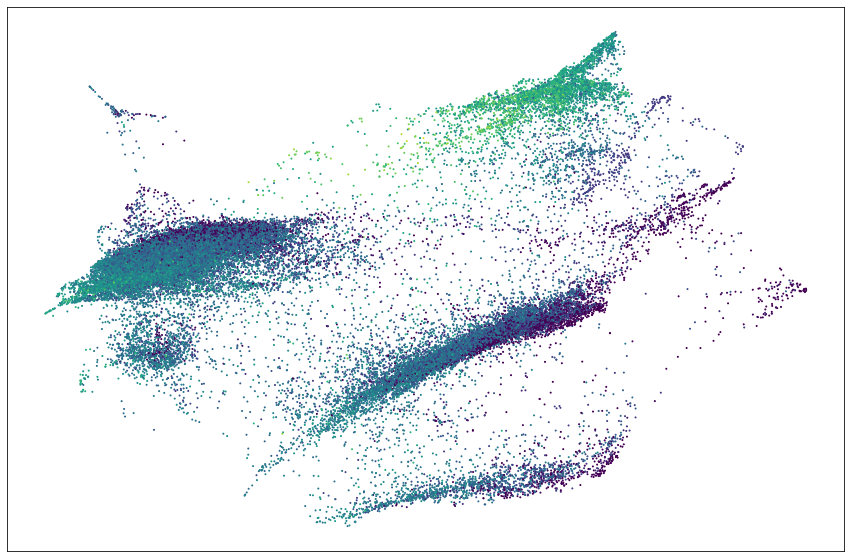

In [ ]:
x=all_phate.iloc[:,0]
y=all_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(15,10))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

patients = {'5':'red','11':'yellow', '21': 'yellow', '23':'blue', '27':'red', '75':'orange', '99':'red', '109':'blue', '141':'red', '216':'yellow', '278':'red'}
culture = {'PDO':'#008C26', 'PDOF':'#FF7F7F'}
treatment = {'DMSO':'silver', 'H20':'silver', 'AH':'silver', 'S':'#0433FF', 'VS':'#011993', 'L':'orange', 'F':'#942193', 
             'C':'darkgoldenrod', 'CS':'#005493', 'CSF':'#0096FF', 'SF':'#7A81FF', 'V':'#FFD479', 'CF':'#941751'}          
plt.scatter(x, y, c=centered_all['cPARP'], s=1)

In [ ]:
x=all_phate.iloc[:,0]
y=all_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(15,10))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

patients = {'5':'red','11':'yellow', '21': 'yellow', '23':'blue', '27':'red', '75':'orange', '99':'red', '109':'blue', '141':'red', '216':'yellow', '278':'red'}
culture = {'PDO':'red', 'PDOF':'blue'}
treatment = {'DMSO':'black', 'H20':'black', 'AH':'black', 'S':'blue', 'VS':'orange', 'L':'green', 'F':'lightblue', 
             'C':'fuchsia', 'CS':'peru', 'CSF':'yellow', 'SF':'cornflowerblue', 'V':'lightgreen', 'CF':'lightsalmon'}              
plt.scatter(x, y, c=data_21['Culture'].map(culture), s=1)

In [ ]:
data_pca = scprep.reduce.pca(grouped_centered_all, n_components=8, method='dense')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
embed = pca.fit_transform(grouped_centered_all)

scprep.plot.scatter2d(embed)